### Import Necessary Libraries

In [177]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

import pickle
import warnings
warnings.filterwarnings('ignore')

### Import Dataset [Train , Test, ]

In [178]:
### Import Train dataset
train_df = pd.read_csv('train.tsv',sep='\t')  
train_df.head(5)

,label,text_a
0,1,选择珠江花园的原因就是方便，有电动扶梯直接到达海边，周围餐馆、食廊、商场、超市、摊位一应俱全...
1,1,15.4寸笔记本的键盘确实爽，基本跟台式机差不多了，蛮喜欢数字小键盘，输数字特方便，样子也很...
2,0,房间太小。其他的都一般。。。。。。。。。
3,0,"1.接电源没有几分钟,电源适配器热的不行. 2.摄像头用不起来. 3.机盖的钢琴漆，手不能摸..."
4,1,"今天才知道这书还有第6卷,真有点郁闷:为什么同一套书有两种版本呢?当当网是不是该跟出版社商量..."


In [179]:
### Import Test dataset
test_df = pd.read_csv('test.tsv',sep='\t')
test_df.head(5)

,label,text_a
0,1,这个宾馆比较陈旧了，特价的房间也很一般。总体来说一般
1,0,怀着十分激动的心情放映，可是看着看着发现，在放映完毕后，出现一集米老鼠的动画片！开始还怀疑是...
2,0,还稍微重了点，可能是硬盘大的原故，还要再轻半斤就好了。其他要进一步验证。贴的几种膜气泡较多，...
3,1,交通方便；环境很好；服务态度很好 房间较小
4,1,不错，作者的观点很颠覆目前中国父母的教育方式，其实古人们对于教育已经有了很系统的体系了，可是...


In [180]:
### Import another dataset
dev_df = pd.read_csv('dev.tsv',sep='\t')
dev_df.head(5)

,label,text_a
0,1,"這間酒店環境和服務態度亦算不錯,但房間空間太小~~不宣容納太大件行李~~且房間格調還可以~~..."
1,1,"<荐书> 推荐所有喜欢<红楼>的红迷们一定要收藏这本书,要知道当年我听说这本书的时候花很长时..."
2,0,商品的不足暂时还没发现，京东的订单处理速度实在.......周二就打包完成，周五才发货...
3,1,２００１年来福州就住在这里，这次感觉房间就了点，温泉水还是有的．总的来说很满意．早餐简单了些．
4,1,不错的上网本，外形很漂亮，操作系统应该是个很大的 卖点，电池还可以。整体上讲，作为一个上网本...


### Train Dataset Analysis & Preprocessing

In [181]:
### Data shape
train_df.shape

(9146, 2)

In [182]:
### Show Data Info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 2 columns):
label     9146 non-null int64
text_a    9146 non-null object
dtypes: int64(1), object(1)
memory usage: 143.0+ KB


In [183]:
### Describe Dtaset
train_df.describe()

,label
count,9146.000000
mean,0.501312
std,0.500026
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [184]:
### Data Label count
train_df['label'].value_counts()

1    4585
0    4561
Name: label, dtype: int64

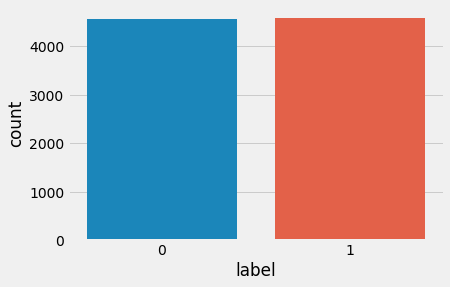

In [185]:
### Show Plot for Train Dataset
plt.style.use('fivethirtyeight')
sns.countplot(data=train_df,x='label')

In [186]:
### Drop Duplicate Value
train_df.drop_duplicates(inplace = True)

In [187]:
train_df

,label,text_a
0,1,选择珠江花园的原因就是方便，有电动扶梯直接到达海边，周围餐馆、食廊、商场、超市、摊位一应俱全...
1,1,15.4寸笔记本的键盘确实爽，基本跟台式机差不多了，蛮喜欢数字小键盘，输数字特方便，样子也很...
2,0,房间太小。其他的都一般。。。。。。。。。
3,0,"1.接电源没有几分钟,电源适配器热的不行. 2.摄像头用不起来. 3.机盖的钢琴漆，手不能摸..."
4,1,"今天才知道这书还有第6卷,真有点郁闷:为什么同一套书有两种版本呢?当当网是不是该跟出版社商量..."
...,...,...
9137,1,《菲菲生气了》告诉孩子，生气是一种很正常的情绪反应，常常是由于自己感到受到了冒犯才引起的。书...
9139,0,标准内存太小，自己加了一个！没有自带的恢复光盘，重装系统后驱动有问题，自带的快捷键无法使用，...
9141,1,看过该书，感觉中医暂时不会消亡，尚有一、二十株老树活着，还有毛以林、黄煌、刘力红等一批有一定...
9143,1,"虽是观景房,不过我住的楼层太低(19楼)看不到江景,但地点很好,离轻轨临江门站和较场口站(起..."


In [188]:
train_df.describe()

,label
count,7948.000000
mean,0.528561
std,0.499215
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


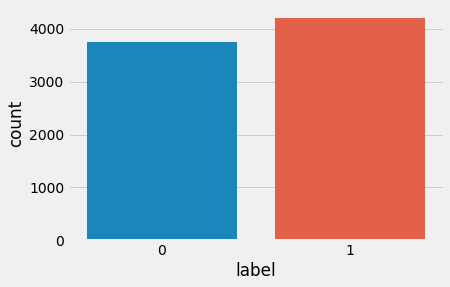

In [189]:
plt.style.use('fivethirtyeight')
sns.countplot(data=train_df,x='label')

In [190]:
train_df['label'].value_counts()

1    4201
0    3747
Name: label, dtype: int64

In [191]:
train_df.isnull().sum()

label     0
text_a    0
dtype: int64

### Test Dataset ANalysis and Preprocessing

In [192]:
### Show Test dataset shape
test_df.shape

(1200, 2)

In [193]:
### Show Test dataset Info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
label     1200 non-null int64
text_a    1200 non-null object
dtypes: int64(1), object(1)
memory usage: 18.9+ KB


In [194]:
### Describe Test dataset
test_df.describe()

,label
count,1200.000000
mean,0.506667
std,0.500164
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [195]:
### Counts Label of Test Dataset 
test_df['label'].value_counts()

1    608
0    592
Name: label, dtype: int64

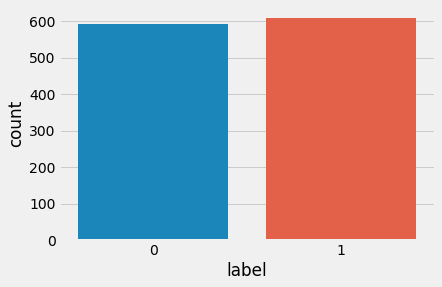

In [196]:
### Show Label Plot for test dataset
plt.style.use('fivethirtyeight')
sns.countplot(data=test_df,x='label')

In [197]:
### Drop duplicate Rows
test_df.drop_duplicates(inplace = True)

In [198]:
test_df

,label,text_a
0,1,这个宾馆比较陈旧了，特价的房间也很一般。总体来说一般
1,0,怀着十分激动的心情放映，可是看着看着发现，在放映完毕后，出现一集米老鼠的动画片！开始还怀疑是...
2,0,还稍微重了点，可能是硬盘大的原故，还要再轻半斤就好了。其他要进一步验证。贴的几种膜气泡较多，...
3,1,交通方便；环境很好；服务态度很好 房间较小
4,1,不错，作者的观点很颠覆目前中国父母的教育方式，其实古人们对于教育已经有了很系统的体系了，可是...
...,...,...
1195,0,位置不很方便，周围乱哄哄的，卫生条件也不如其他如家的店。以后绝不会再住在这里。
1196,0,抱着很大兴趣买的，买来粗粗一翻排版很不错，姐姐还说快看吧，如果好我也买一本。可是真的看了，实...
1197,1,东西不错，不过有人不太喜欢镜面的，我个人比较喜欢，总之还算满意。
1198,1,"房间不错,只是上网速度慢得无法忍受,打开一个网页要等半小时,连邮件都无法收。另前台工作人员服..."


In [199]:
test_df.describe()

,label
count,1179.000000
mean,0.508906
std,0.500133
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


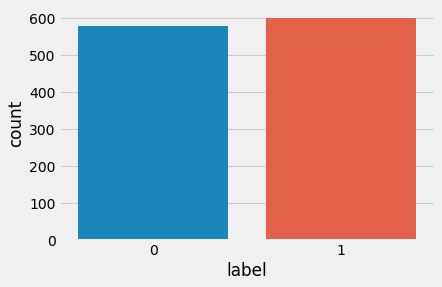

In [200]:
### Show Label plot after drop duplicate rows
plt.style.use('fivethirtyeight')
sns.countplot(data=test_df,x='label')

In [201]:
test_df['label'].value_counts()

1    600
0    579
Name: label, dtype: int64

In [202]:
### Check Null Value
test_df.isnull().sum()

label     0
text_a    0
dtype: int64

### Another Dataset ANalysis and Preprocessing

In [203]:
### Data shape
dev_df.shape

(1200, 2)

In [204]:
### Show Data Info
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
label     1200 non-null int64
text_a    1200 non-null object
dtypes: int64(1), object(1)
memory usage: 18.9+ KB


In [205]:
### Describe Dtaset
dev_df.describe()

,label
count,1200.000000
mean,0.494167
std,0.500174
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [206]:
### Data Label count
dev_df['label'].value_counts()

0    607
1    593
Name: label, dtype: int64

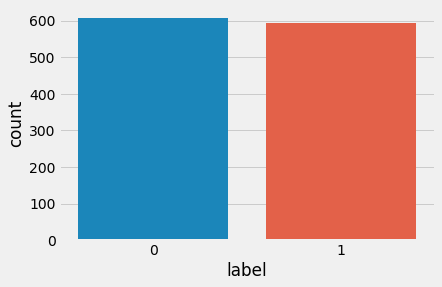

In [207]:
### Show Plot for Train Dataset
plt.style.use('fivethirtyeight')
sns.countplot(data=dev_df,x='label')

In [208]:
### Drop duplicate Rows
dev_df.drop_duplicates(inplace = True)

In [209]:
dev_df

,label,text_a
0,1,"這間酒店環境和服務態度亦算不錯,但房間空間太小~~不宣容納太大件行李~~且房間格調還可以~~..."
1,1,"<荐书> 推荐所有喜欢<红楼>的红迷们一定要收藏这本书,要知道当年我听说这本书的时候花很长时..."
2,0,商品的不足暂时还没发现，京东的订单处理速度实在.......周二就打包完成，周五才发货...
3,1,２００１年来福州就住在这里，这次感觉房间就了点，温泉水还是有的．总的来说很满意．早餐简单了些．
4,1,不错的上网本，外形很漂亮，操作系统应该是个很大的 卖点，电池还可以。整体上讲，作为一个上网本...
...,...,...
1195,0,从我下单到拿到手等了足足10天！而且每天打不下10个电话！不过客服的服务态度还不错
1196,0,入住前的期待还是很高，不过到达后感觉还是比较失望，这个价值和七斗星、如家等不到200元房价的...
1197,0,位置尚可，但距离海边的位置比预期的要差的多，只能远远看大海，没有停车场
1198,1,整体来说，本书还是不错的。至少在书中描述了许多现实中存在的司法系统方面的问题，这是值得每个法...


In [210]:
dev_df.describe()

,label
count,1179.000000
mean,0.498728
std,0.500211
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


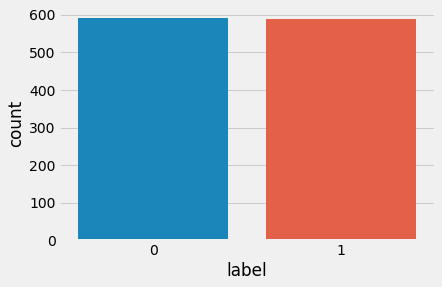

In [211]:
### Show Label plot after drop duplicate rows
plt.style.use('fivethirtyeight')
sns.countplot(data=dev_df,x='label')

In [212]:
dev_df['label'].value_counts()

0    591
1    588
Name: label, dtype: int64

In [213]:
dev_df.isnull().sum()

label     0
text_a    0
dtype: int64

### Indentify Train , Test and Another dataet value

In [214]:
X_train=train_df['text_a'].values
Y_train=train_df['label'].values

In [215]:
X_test=test_df['text_a'].values
Y_test=test_df['label'].values

In [216]:
X_dev=dev_df['text_a'].values
Y_dev=dev_df['label'].values

### Analysis & Preprocessing Train and Test  Dataset

In [217]:
(X_train.shape,Y_train.shape),(X_test.shape,Y_test.shape)

(((7948,), (7948,)), ((1179,), (1179,)))

In [218]:
train_df.iloc[:,1].describe()

count                                            7948
unique                                           7926
top       笔记本不错，京东不够厚道，钻石抢的和现在促销价没差几分，这不是忽悠我们钻石一族吗？？？
freq                                                2
Name: text_a, dtype: object

In [219]:
test_df.iloc[:,1].describe()

count                                                1179
unique                                               1178
top       用起来还不错，本人还有几张2000-100 1000-50 东券要的加qq 673946022
freq                                                    2
Name: text_a, dtype: object

(array([7.946e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.1320e+02, 2.2540e+02, 3.3760e+02, 4.4980e+02,
        5.6200e+02, 6.7420e+02, 7.8640e+02, 8.9860e+02, 1.0108e+03,
        1.1230e+03]),
 <a list of 10 Patch objects>)

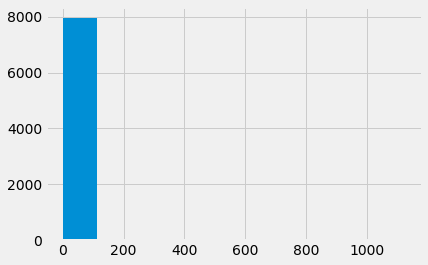

In [220]:
X_train_len=[len(str(i).split()) for i in X_train]
plt.hist(X_train_len)

(array([1092.,   65.,   12.,    8.,    0.,    0.,    0.,    0.,    0.,
           2.]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <a list of 10 Patch objects>)

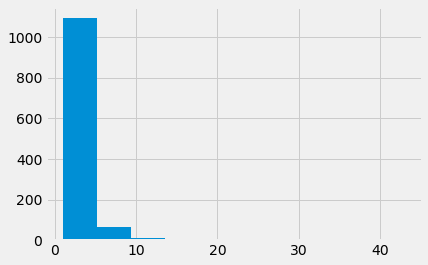

In [221]:
X_test_len=[len(str(i).split()) for i in X_test]
plt.hist(X_test_len)

In [222]:
vocab_size=30000 
embedding_dimension=64 
turnc='post'#preprocessing step for pad_sequences
oov_tok='<OOV>'#oov stands for out of vocabulary tokens

In [223]:
# vectorising the text
vect = CountVectorizer(stop_words=None)

In [224]:
vect.fit(X_train)

CountVectorizer()

In [225]:
vect.vocabulary_

{'选择珠江花园的原因就是方便': 76211,
 '有电动扶梯直接到达海边': 52288,
 '周围餐馆': 25250,
 '食廊': 80797,
 '商场': 25921,
 '超市': 71483,
 '摊位一应俱全': 47700,
 '酒店装修一般': 78172,
 '但还算整洁': 15002,
 '泳池在大堂的屋顶': 56778,
 '因此很小': 26859,
 '不过女儿倒是喜欢': 6683,
 '包的早餐是西式的': 20208,
 '还算丰富': 73267,
 '服务吗': 52658,
 '一般': 4004,
 '15': 233,
 '4寸笔记本的键盘确实爽': 1196,
 '基本跟台式机差不多了': 28224,
 '蛮喜欢数字小键盘': 67860,
 '输数字特方便': 71912,
 '样子也很美观': 54122,
 '做工也相当不错': 16418,
 '房间太小': 44529,
 '其他的都一般': 17532,
 '接电源没有几分钟': 47248,
 '电源适配器热的不行': 59668,
 '摄像头用不起来': 47670,
 '机盖的钢琴漆': 53767,
 '手不能摸': 45814,
 '一摸一个印': 3628,
 '硬盘分区不好办': 62066,
 '今天才知道这书还有第6卷': 10912,
 '真有点郁闷': 61640,
 '为什么同一套书有两种版本呢': 7991,
 '当当网是不是该跟出版社商量商量': 37013,
 '单独出个第6卷': 20519,
 '让我们的孩子不会有所遗憾': 69586,
 '机器背面似乎被撕了张什么标签': 53678,
 '残胶还在': 54822,
 '但是又看不出是什么标签不见了': 13932,
 '该有的都在': 70164,
 '呵呵': 25353,
 '虽然表皮看上去不错很精致': 67757,
 '但是我还是能看得出来是盗的': 14186,
 '但是里面的内容真的不错': 14606,
 '我妈爱看': 41998,
 '我自己也学着找一些穴位': 43477,
 '这本书实在是太烂了': 74728,
 '以前听浙大的老师说这本书怎么怎么不对': 11974,
 '哪些地方都是误导的还不相信': 25684,
 '终于买了一

In [226]:
vect.get_feature_names()

['00',
 '007',
 '00pm以后有表演',
 '00下单',
 '00下的单',
 '00之前退房',
 '00了',
 '00人家还可以分期的',
 '00元',
 '00到',
 '00到的',
 '00前联系',
 '00叫早',
 '00后到达',
 '00后才行',
 '00左右到达的酒店',
 '00左右无水供应',
 '00才可能退出来',
 '00有泡温泉的安排',
 '00点以后入住的宾客只算当天房价',
 '00点相差时间较长',
 '00离开酒店时',
 '00结束',
 '00还能听到走廊以及隔壁不该听到的声音',
 '00通过携程如入吉林省亚泰饭店',
 '01',
 '010',
 '02',
 '027',
 '02800923158',
 '02840189',
 '02的火车',
 '03',
 '0311',
 '03到了前台退房',
 '03跑了15000',
 '04',
 '04房间的窗外景色还是那么的美',
 '05',
 '06',
 '06分',
 '06年8月24日',
 '06年和08年逐步装修了四个楼层',
 '06年新装',
 '06机子表面大部分地方都几乎不感觉到热',
 '06跑了7000多分',
 '0791',
 '07年已全面安装隔间窗',
 '07年带孩子通过携程定房住22层',
 '07年曾经住过一次',
 '07年都挺好的',
 '08',
 '08年10月生产的',
 '08年2月份入住的大床房',
 '08年4月初住过一夜',
 '08年5月22日',
 '08年的春天带着朋友重游泰山',
 '08年第一季度生产的',
 '09',
 '099',
 '09年5月草原是个脆弱的平衡生态',
 '09年6月1日的发票',
 '0g',
 '0不稳定',
 '0反反复复',
 '0回转交易',
 '0国王只能住楼上',
 '0播放外置dvd光驱中的蓝光碟也非常清晰流畅',
 '0星service',
 '0版好像是为vista系统准备的',
 '0版本的ok',
 '0版的驱动',
 '0的',
 '0的屏比自己的稍小',
 '0的评分',
 '0的高分数',
 '0装了系统',
 '10',
 '100',
 '1000',
 '1001000',
 '100万位运算成绩27',

In [227]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [228]:
print(X_test[:1])

['这个宾馆比较陈旧了，特价的房间也很一般。总体来说一般']


In [229]:
print(X_test_tranformed)

  (1, 5625)	1
  (1, 18707)	1
  (1, 22362)	1
  (1, 23572)	1
  (1, 23670)	1
  (1, 27481)	1
  (1, 30447)	1
  (1, 36659)	1
  (1, 38440)	1
  (1, 42469)	1
  (1, 61420)	1
  (1, 63495)	1
  (1, 76745)	1
  (3, 10324)	1
  (3, 45049)	1
  (3, 52922)	1
  (3, 58392)	1
  (4, 7148)	1
  (4, 32043)	1
  (5, 22089)	1
  (6, 2210)	1
  (6, 44529)	1
  (7, 16478)	1
  (7, 37938)	1
  (7, 48139)	1
  :	:
  (1175, 30884)	1
  (1175, 31543)	1
  (1175, 33790)	1
  (1175, 42479)	1
  (1175, 46000)	1
  (1175, 46585)	1
  (1175, 63903)	1
  (1175, 80385)	1
  (1176, 6849)	1
  (1176, 7423)	1
  (1176, 38911)	1
  (1176, 40552)	1
  (1177, 22169)	1
  (1177, 22449)	1
  (1177, 22555)	1
  (1177, 44337)	1
  (1177, 46102)	1
  (1177, 75849)	1
  (1178, 7328)	1
  (1178, 24045)	1
  (1178, 25371)	1
  (1178, 31372)	1
  (1178, 46991)	1
  (1178, 67095)	1
  (1178, 72151)	1


In [263]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate bernoulli NB object
bnb = BernoulliNB()

# Fit The 
bnb.fit(X_train_transformed,Y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# Predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)


In [265]:
bnb

BernoulliNB()

In [266]:
cv = CountVectorizer()

In [267]:
x_train = cv.fit_transform(X_train)
x_test = cv.fit_transform(X_test)
x_dev = cv.fit_transform(X_dev)

In [268]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [273]:
### Train Dataset Accuracy
model.fit(x_train,Y_train)
model.score(x_train,Y_train)

0.9940865626572722

In [274]:
### Test Dataset Accuracy
model.fit(x_test,Y_test)
model.score(x_test,Y_test)

0.9991518235793045

In [275]:
### Another Dataset Accuracy
model.fit(x_dev,Y_dev)
model.score(x_dev,Y_dev)

0.9974554707379135

In [276]:
metrics.confusion_matrix(Y_test, y_pred_class)

array([[321, 258],
       [ 30, 570]], dtype=int64)

In [277]:
confusion = metrics.confusion_matrix(Y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[321 258]
 [ 30 570]]


In [278]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.95


In [279]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.5544041450777202


In [280]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(Y_test, y_pred_class))

precision 0.6884057971014492
0.6884057971014492


In [281]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(Y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(Y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(Y_test, y_pred_class))

precision 0.6884057971014492
PRECISION SCORE : 0.6884057971014492
RECALL SCORE : 0.95
F1 SCORE : 0.7983193277310924


In [282]:
y_pred_proba

array([[3.53293671e-01, 6.46706329e-01],
       [9.99949636e-01, 5.03638385e-05],
       [3.53293671e-01, 6.46706329e-01],
       ...,
       [2.98484232e-02, 9.70151577e-01],
       [1.48101104e-02, 9.85189890e-01],
       [9.97160085e-01, 2.83991491e-03]])

In [283]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [284]:
print (roc_auc)

0.8780325273459988


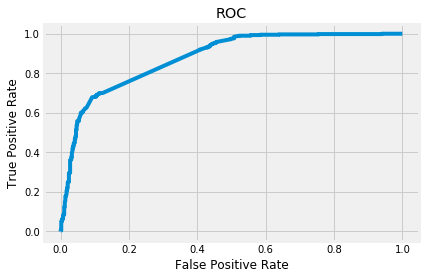

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

### Check Model With Predict

In [286]:
review = ['机器背面似乎被撕了张什么标签，残胶还在。但是又看不出是什么标签不见了，该有的都在，怪','地理位置佳，在市中心。酒店服务好、早餐品种丰富。我住的商务数码房电脑宽带速度满意,房间还算干净，离湖南路小吃街近。']

In [287]:
cv_review = cv.transform(review)

In [288]:
model.predict(cv_review)

array([0, 1], dtype=int64)

### Generate Pickle File

In [289]:
#Saving model
pickle.dump(model, open('saici_task.pkl', 'wb'))

In [290]:
#Testing model by loading it first
model1= pickle.load(open('saici_task.pkl', 'rb'))

### Thank you Saici.ai Team 